In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
sns.set()

In [2]:
df = pd.read_csv("brasil-real-estate-clean.csv")
df.head()

,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,Alagoas
2,house,Northeast,211.0,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227,Alagoas


In [3]:
df.shape

(22844, 7)

In [4]:
df["state"].unique()

array(['Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'],
      dtype=object)

In [5]:
df_rio = df[df["state"] == "Rio Grande do Sul"]
df_rio.head()

,property_type,region,area_m2,price_usd,lat,lon,state
12195,house,South,188.0,115770.288401,-30.027105,-51.130470,Rio Grande do Sul
12196,apartment,South,65.0,123430.141066,-30.039816,-51.223164,Rio Grande do Sul
12197,apartment,South,142.0,185145.222571,-29.696850,-53.858382,Rio Grande do Sul
12198,apartment,South,151.0,256571.996865,-30.033820,-51.198596,Rio Grande do Sul
12199,apartment,South,68.0,75957.012539,-30.034061,-51.135494,Rio Grande do Sul


In [6]:
df_rio.shape

(2643, 7)

Check the distribution of apartments using a histogram of `area_m2`

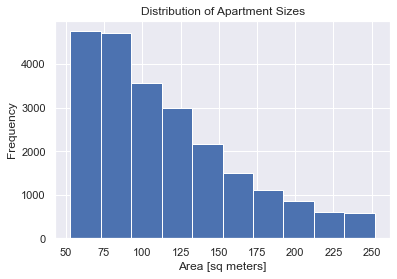

In [7]:
# Build histogram
plt.hist(
    df["area_m2"]
)


# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Apartment Sizes")

# save the histogram as an image
plt.savefig("images/1-1.png", dpi=150)

Explore the relationship between `price_usd`and `area_m2`

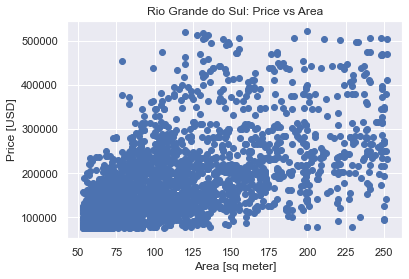

In [8]:
plt.scatter(x=df_rio.area_m2, y=df_rio.price_usd)

# Add axis labels
plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")

# Add title
plt.title("Rio Grande do Sul: Price vs Area")

# save the histogram as an image
plt.savefig("images/1-2.png", dpi=150)

Check summary statistics using `describe()` function

In [9]:
df_rio["area_m2"].describe()

count    2643.000000
mean      108.667045
std        48.617935
min        53.000000
25%        71.000000
50%        93.000000
75%       132.500000
max       252.000000
Name: area_m2, dtype: float64

Create a horizontal boxplot of `"area_m2"`. X label `"Area [sq meters]"` and the plot has the title `"Distribution of Home Sizes"`. Use Matplotlib (`plt`).

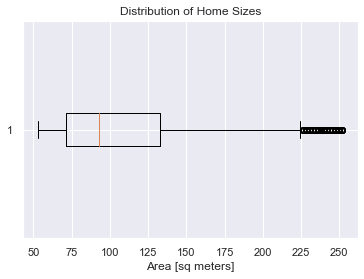

In [10]:
# Build box plot

plt.boxplot(
     df_rio["area_m2"],
    vert=False
)


# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes")

# Don't change the code below 👇
plt.savefig("images/1-3.png", dpi=150)

There are `"outliers"` So we will try to remove the `outliers` 

Since **75%** of the apartments are less than  **150 sq meters**, remove the *top 10%* and *bottom 10%*

In [11]:
# Get apartments between the quartile range
low, high = df_rio["area_m2"].quantile([0.1, 0.9])

mask_area = df_rio["area_m2"].between(low, high)

df_rio = df_rio[mask_area]

In [12]:
df_rio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 12196 to 14837
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  2142 non-null   object 
 1   region         2142 non-null   object 
 2   area_m2        2142 non-null   float64
 3   price_usd      2142 non-null   float64
 4   lat            2142 non-null   float64
 5   lon            2142 non-null   float64
 6   state          2142 non-null   object 
dtypes: float64(4), object(3)
memory usage: 133.9+ KB


In [13]:
df_rio.shape

(2142, 7)

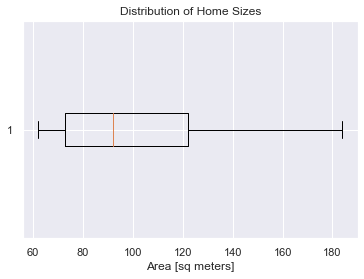

In [14]:
# Build box plot

plt.boxplot(
     df_rio["area_m2"],
    vert=False
)


# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes")

# Don't change the code below 👇
plt.savefig("images/1-4.png", dpi=150)

Again let us explore the relationship between the `price_usd`and `area_m2`

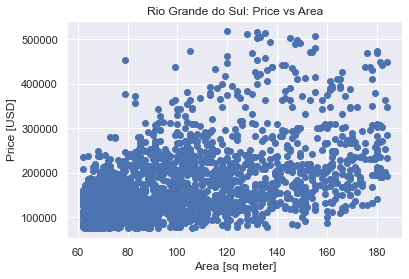

In [70]:
plt.scatter(x=df_rio.area_m2, y=df_rio.price_usd)

# Add axis labels
plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")

# Add title
plt.title("Rio Grande do Sul: Price vs Area")

# save the histogram as an image
plt.savefig("images/1-5.png", dpi=150)

## Split

**Vertical split** - Split `df_rio` into the feature matrix (X) and target vector (y)

In [34]:
target = "price_usd"
feature = ["area_m2"]

y = df_rio[target]
X = df_rio[feature]

In [35]:
y.head()

12196    123430.141066
12197    185145.222571
12198    256571.996865
12199     75957.012539
12200    237365.667712
Name: price_usd, dtype: float64

In [36]:
X.head()

,area_m2
12196,65.0
12197,142.0
12198,151.0
12199,68.0
12200,149.0


**Horizontal (Train-Test) Split** - Split X and y into training and test sets. 80% of the data should be for training and the remaining 20% for test

In [37]:
cutoff = int(len(X) * 0.8)

X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]

X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

## BUILD MODEL

Baseline `mean_absolute_error`

In [71]:
# Find the mean value for all the `y_train`
y_mean = y_train.mean()
y_mean

169853.71035068404

***Prediction List***

Create a list **y_pred_baseline** that contains the value of `y_mean` repeated so that it is the same length as `y`

In [39]:
y_pred_baseline = [y_mean] * len(y_train)

In [40]:
len(X_train)

1713

**Baseline Scatter Plot:** Plot the baseline on top of the area vs price scatterplot

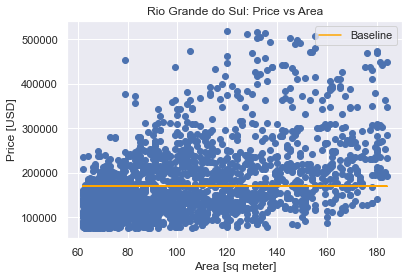

In [66]:
# Area vs price scatter plot
plt.scatter(x=df_rio["area_m2"], y=df_rio["price_usd"])

# Baseline plot
plt.plot(X_train, y_pred_baseline, label = "Baseline", color = "orange")

# Add axis labels
plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")

# Add title
plt.title("Rio Grande do Sul: Price vs Area")

plt.legend()

# save the histogram as an image
plt.savefig("images/1-6.png", dpi=150)

**Baseline Mean Absolute Error:** Calculate the baseline `mean_absolute_error` for prediction in **y_pred_baseline** as compared to the true targets in y. ***The target is to get the mean absolute error closest to zero***

In [43]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Apartment Price: ", round(y_mean, 2))
print("Baseline MAE: ", round(mae_baseline, 2))

Mean Apartment Price:  169853.71
Baseline MAE:  61273.03


**Instantiate Model**

Instantiate a `LinearRegression` model to be trained.

In [45]:
model = LinearRegression()

**Train Model**

Fit the model to the training set **(X_train and y_train)**

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Check if model is fitted
check_is_fitted(model)

**Evaluate Model:** See how the data performs when making predictions on the data that it saw during training.

In [49]:
y_pred_training = model.predict(X_train)

y_pred_training

array([124326.56418015, 221279.58344199, 232611.75452454, ...,
       155804.81718724, 194837.85091603, 129363.08466128])

**Training Mean Absolute Error:** Calculate the mean absolute error of the prediction in y_pred_training as compared to the true targets in y_train

In [51]:
mae_training = mean_absolute_error(y_train, y_pred_training)

print("Training MAE: ", round(mae_training, 2))

Training MAE:  52659.6


**Evaluate Model:** Check how the model performs on the data that it has not seen before (test sets)

In [56]:
y_pred_test = pd.Series(model.predict(X_test))

y_pred_test.head()

0    216243.062961
1    135658.735263
2    130622.214782
3    242684.795487
4    165877.858150
dtype: float64

**Extract model Intercept**

In [60]:
intercept = round(model.intercept_, 2)
intercept

42483.11

**Extract Model Coefficient**

In [62]:
coefficient = round(model.coef_[0], 2)
coefficient

1259.13

**Model Equattion**

y = intercept + (coefficient * area_m2)

y = 42483.11 + (1259.13 * area_m2)

### **Visualize:** Plot Model

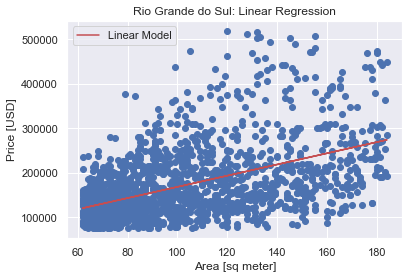

In [69]:
plt.plot(X_train, model.predict(X_train), color = "r", label = "Linear Model")

plt.scatter(X_train, y_train)

# Add axis labels
plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")

# Add title
plt.title("Rio Grande do Sul: Linear Regression")

plt.legend()

# save the histogram as an image
plt.savefig("images/1-7.png", dpi=150)